# A Quick Introduction to Plotting and Animation with Python


Today we'll be plotting a wave packet composed of plane waves as a function of position and time.  The form of our wave packet will be

 $$f(x,t) = \frac{1}{2\pi} e^{ik_{0}(x-ct)-\frac{(x-ct)^{2}\sigma^{2}}{2}}$$
 
Where $k_{0}$ is the wave number of the packet, $c$ is the velocity of the wave packet, and $\sigma$ is the dispersion or width of the wave packet.

## Part 1: Getting Started

First we import our plotting and data modules

In [71]:
%matplotlib inline

import numpy as np # for numerical operations and array manipulation 
import matplotlib.pyplot as plt # for plotting

#### Creating the Wave Packet

We define our function of $t$ and $x$ representing the wave packet using a few numpy functions, and include some default values for the constants.  You should be able to parse and understand this code yourself based on the equation presented above.

In [72]:
def f(x, t, k_0=1.0, c=1.0, sigma=1.0): 
    
    return 1.0/(2*np.pi)*np.exp(1.0j*k_0*(x-c*t))*np.exp(-(x-c*t)**2*sigma**2/2)


#### Plotting the Data
We make a simple example plotting the wave at time $t=0$

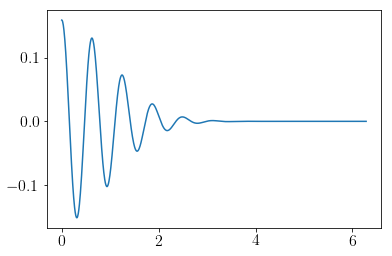

In [73]:
x = np.linspace(0,2*np.pi, 1000) # create a list of 1000 x-values from 0 to 2pi
t = 0

y = f(x, t, k_0=10).real # we take the real part of the array for plotting

plt.plot(x,y); # this function creates a plot of x vs y

## Part 2: Minor Improvements

#### Labelling Your Axes

We can improve the quality of these plots in a few ways.

First, we'll do the basics: Labeling our axes and making a title.

We'll make the title of the plot the function that we are plotting.  The first thing we'll do is define what we want our labels to be.

In [74]:
title = r'$f(x,t) = \frac{1}{2\pi} e^{ik_{0}(x-ct)-\frac{(x-ct)^{2}\sigma^{2}}{2}}$'
xlabel = r'$x$'
ylabel = r'$f(x,t)$'

Notice a few things.  First, we have our labels surrounded by '$' symbols.  This creates LaTeX style processing of our labels.  Next, the 'r' character before the string.  This makes the string 'raw', meaning '\' will not create escape sequences.  This is useful for LaTeX processing as we tend to use a lot of '\' characters.

If you are unaware of what LaTeX (pronounced Lah-Tek), it's a word processing language generally used in scientific publications to make high quality articles containing figures, math, sections, citations, etc.  Matplotlib supports the LaTeX language for it's ability to nicely display equations and symbols.  This isn't a lesson on LaTeX though, so don't worry too much about being able to understand it.  We're just using it to make the plots pretty.

Now we'll actually go about setting the properties.  


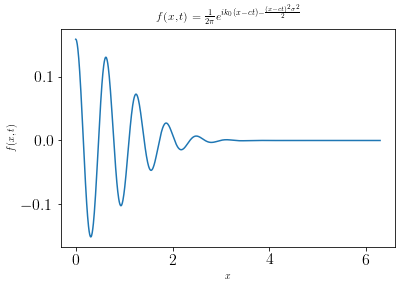

In [75]:
plt.plot(x, y)

plt.title(title);
plt.xlabel(xlabel);
plt.ylabel(ylabel);

#### Resizing and Improving Resolution

These labels are a bit difficult to read, and our figure is kind of small.  I prefer to use the object oriented approach the matplotlib instead to give me more control over the settings.  We will create a figure and axes instance and manipulate those instead.  Plotting with an axes instance is very similar to plotting with plt.  We will use the 'subplots' function to create our figure and axes as well as change some of the settings of the plot.  

We will make an 8"x5" plot with a resolution of 80 dpi (dots per inch), a little bigger than the default.

We also have a bit of extra space on the x-axis before and after the line.  This can be cleaned up by setting the x limits of the plot so we might as well take the time now to do that.

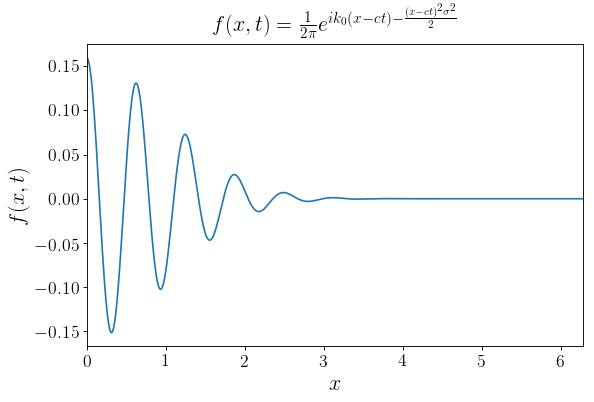

In [76]:
figure, axes = plt.subplots(1,1, figsize=(8,5), dpi=80) # 1,1 indicates we only want a 1x1 grid of subplots

axes.plot(x,y); # the call for plotting is just the same
axes.set_xlim(0, 2*np.pi);

axes.set_title(title, fontsize=20); # we now we .set_[property] with the axes objects
axes.set_xlabel(xlabel, fontsize=20);
axes.set_ylabel(ylabel, fontsize=20);



#### Improving Matplotlib Behavior

You might be starting to think this plot looks pretty good!  But there are still a couple of issues.  For one, the LaTeX font isn't being used, and our tick labels are still pretty small.  This can be corrected by setting the global matplotlib rcParameters using plt.rc with the parameters we want to update.

In [77]:
plt.rc('text', usetex=True) # set matplotlib to use the LaTeX font
plt.rc('xtick', labelsize=16)    # set the default font size of the tick labels
plt.rc('ytick', labelsize=16)


And that's all we have to do!  Now these settings are save globally so the next time we plot they will be used.

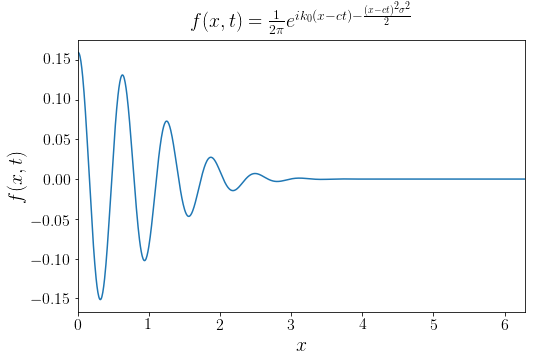

In [78]:
figure, axes = plt.subplots(1,1, figsize=(8,5)) # 1,1 indicates we only want a 1x1 grid of subplots

axes.plot(x,y);
axes.set_xlim(0, 2*np.pi);

axes.set_title(title, fontsize=20);
axes.set_xlabel(xlabel, fontsize=20);
axes.set_ylabel(ylabel, fontsize=20);

## Part 3: Editing the Tick Markers

Dang! This plot is looking good!  But there are still a few things that might be nice to have.  For example, we're plotting $x$ over one full cycle, so it might be a little more clear to represent the x-axis in terms of fractions of pi.  This is going to require use of a new module.  The matplotlib.ticker module allows us to edit tick locations and formats.

In [79]:
import matplotlib.ticker as tkr

#### Relocating the Ticks to Accomidate the Data

First we'll just set the locations of our ticks.  This is pretty easy using the matplotlib.ticker module as it comes with many convienient tick locators.  We will chose MultipleLocator to set the ticks to be at multiples of some base.  In our case I'm chosing $\frac{\pi}{4}$. The first thing I'll do is just create the locator itself.

In [80]:
x_tick_locator = tkr.MultipleLocator(np.pi/4)

Seems simple enough, and setting the locator is just as easy once we have our plot set up.

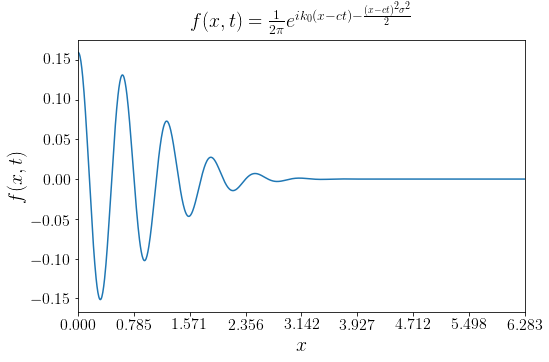

In [81]:
figure, axes = plt.subplots(1,1, figsize=(8,5))

axes.plot(x,y);
axes.set_xlim(0, 2*np.pi);

axes.set_title(title, fontsize=20);
axes.set_xlabel(xlabel, fontsize=20);
axes.set_ylabel(ylabel, fontsize=20);

axes.xaxis.set_major_locator(x_tick_locator) # set the major tick locator on the x-axis

#### Creating Your Own Tick Labels

Looks like we might have gone a bit backwards here.  These x-tick labels are not quite readable as decimal digits.  The ticker module though allows us to use any reprsentation we want though.  We will choose to use FuncFormatter as it allows us to pass a function that takes a value and a position as arguments and returns a label.  We'll ignore the postition argument though as it's not useful towards what we're doing.  We can write our own function for returning nicely formatted tick labels in terms of fractions of $\pi$.  To calculate the numerator and denominator of our fractions, we'll the Python's built in 'fractions' module.

In [82]:
import fractions as frc

def x_tick_format_function(x, pos):
    
    fraction = frc.Fraction(x/np.pi) # we get x in terms of a fraction of pi

    if fraction == 0: # we don't want the label to be '0\pi', we just want zero
        return r'$0$'

    if fraction == 1: # likewise, we don't typically represent constants as '1\pi', so we'll just make this '\pi'
        return r'$\pi$'

    if fraction.denominator == 1: # lastly, if we have a whole number, we can just write is as 'N\pi' rather than 'N/1\pi'
        return r'${0}\pi$'.format(fraction.numerator)

    return r'$\frac{{{0}}}{{{1}}}\pi$'.format(fraction.numerator, fraction.denominator) #our default case        

Now that we have the formatting function, we can create the formatter just as easily as before.

In [83]:
x_tick_formatter = tkr.FuncFormatter(x_tick_format_function)

And setting the formatter is just as easy as beofre as well.

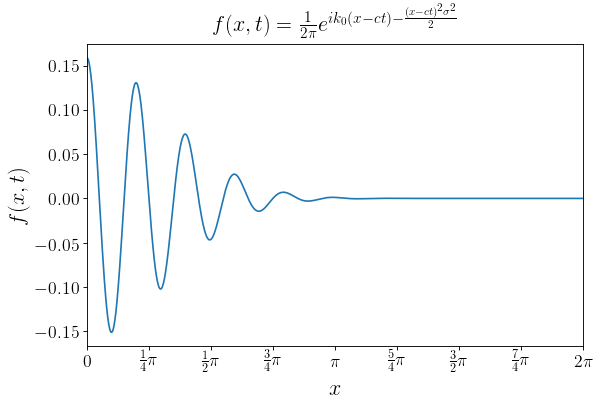

In [84]:
figure, axes = plt.subplots(1,1, figsize=(8,5), dpi=80)

axes.plot(x,y);
axes.set_xlim(0, 2*np.pi);

axes.set_title(title, fontsize=20);
axes.set_xlabel(xlabel, fontsize=20);
axes.set_ylabel(ylabel, fontsize=20);

axes.xaxis.set_major_locator(x_tick_locator)
axes.xaxis.set_major_formatter(x_tick_formatter) # setting the formatter works just as before

## Part 4: Animation

Okay, so this is one sharp looking plot!  From here you'll probably be ready to put it in your homework, presentation, poster, or paper.  But what if you want to go a little further?  Show something that can't be represented on a static piece of paper.  Afterall, this is a *moving* wave packet, wouldn't you like to see it move?  

Here I'll quickly introduce the matplotlib animation module.  This section might be a little difficult for inexperienced Python users, but if you've made it this far without too much trouble, you should be just fine.

In [85]:
import matplotlib.animation as anm

The animation module allows us to make animated plots using various library tools and save them in formats we like.  The actual process of saving relies on third party libraries though that you may have to install on your own, but they all exist on this machine for you're own convienience.  The animating tool we will use will be another matplotlib function that takes a function as an argument.  This function will determine how our plot looks at every frame.  It takes a frame as an argument, and returns a list of matplotlib artists to update on the figure.  We'll decide just exactly what a 'frame' is ourselves.  

#### Preparing The Data

Our first step will be to pre-compute the plot information for each frame.  We will then be able to send this information to our update function when making the animation.

In [86]:
x = np.linspace(0,2*np.pi, 1000).reshape(1,-1) # the same as before, but now we have a 1x1000 column vector
t = np.linspace(-5,10,450).reshape(-1,1) #we'll look at time from t=-5 to t=10, this is represented as a 450x1 row vector

# when we perform operations between the row and column vector,
# we'll get a matrix (2D array) whose columns represent the wave packet at some time

frame_data = f(x, t, k_0=10) # notice this time we didn't take the real part!  
# We're going to plot the real and imaginary components!

#### Preparing the Plot

Now well set up our figure and axes similar to before, but we'll grab the artist we want to update from the plotting function when we give it an initial value.

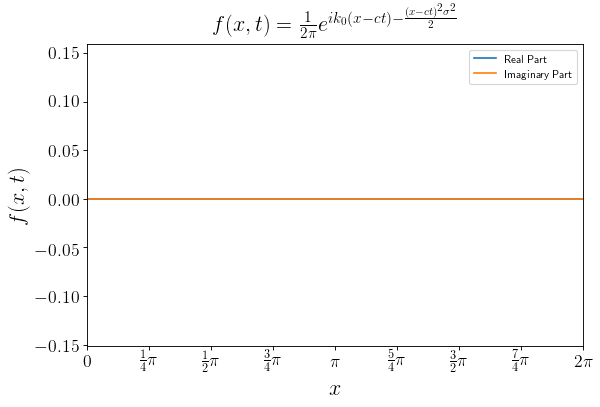

In [87]:
figure, axes = plt.subplots(1,1, figsize=(8,5), dpi=80)

line_real, = axes.plot(x[0],frame_data[0].real, label='Real Part');
line_imag, = axes.plot(x[0],frame_data[0].imag, label='Imaginary Part'); # the first value returned by axes.plot is the line artist iself, 
# which we'll need to updating the animation
# We also have to call the first index of x since it's now a column vector, so the first and only element is our original x
# For frame_data, the 0th index is our first frame, f(x,t=-5), you can probably see how we're going to be able to use this
# data object for easily updating the frames

axes.set_xlim(0, 2*np.pi);
axes.set_ylim(frame_data.real.min(), frame_data.real.max()) # we'll also set the y-limits just to be more explicit

axes.set_title(title, fontsize=20);
axes.set_xlabel(xlabel, fontsize=20);
axes.set_ylabel(ylabel, fontsize=20);

axes.xaxis.set_major_locator(x_tick_locator)
axes.xaxis.set_major_formatter(x_tick_formatter) # setting the formatter works just as before

axes.legend(); # This is a nice little guy who will label our lines for us according the the labels provided in the plot functions

Now, this doesn't look like much.  The lines don't really look that interesting.  But that's not important, remember, we're just setting up our figure and axes to get ready for animating, this plot doesn't mean much right now.

#### Creating The Animation

The next step is to create our update function.  This is pretty easy.  It's just a function that takes a single argument, the frame, and returns the artists (our lines) that it wants to update (after updaing them of course).  As we said before, we'll decide that the 'frame' argument will just be one of the column-vectors in the 'frame_data' array, i.e. the y-values of the wave-packet at each time step.  Since x isn't changing, we actually only ever need to update the y-values in the lines.  This can be accomplished quite easily.

In [88]:
def update_animation(frame): # remember, each frame is just the data we want to be send to our plots
    
    line_real.set_ydata(frame.real) # possibly the most complicated and intricate step in this entire tutorial
    line_imag.set_ydata(frame.imag)
    return line_real, line_imag


Now we put it all together using FuncAnimation.  This function takes the figure you want to animate, the function that you want to do the updating, the frames that will be passed to said function, and the interval (time) of each frame in milliseconds.

In [89]:
animation = anm.FuncAnimation(figure, update_animation, frames=frame_data, interval=25)

So now we've got this animation object thingy, but where is the animation?  Well, as it turns out, to display animations in web browsers, we need to edit one more rcParameter.

In [90]:
plt.rc('animation',html='html5')

Now that the parameter has been set, we can watch our animation by simply running a line containing it.  This will take a bit of time as matplotlib has yet to actually render the animation, so sit tight for a few seconds.

In [91]:
animation

#### Saving for Later

And lastly, you might one day want to show you animation to someone who doesn't have access to your computer.  We can save the animation an a variety of formats quite easily so you can send your results to your professor, share your cool simulations with your friends, or send to your mommy to hang up on her fridge. Matplotlib automatically figures out the file format you want to save your animation as from the file extension you provide in your file name.

In [92]:
animation.save("PlaneWave.mp4")